In [1]:
from bs4 import BeautifulSoup
import requests
from urllib.parse import quote_plus

In [2]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [2]:
song = "Here's Where The Story Ends"
band = "Sundays"
year = "1990"

In [3]:
root_url = "https://www.lyricsfreak.com"
search_stem = "/search.php?q="

In [4]:
url = root_url + search_stem + song
response = requests.get(url)
response.status_code

200

In [5]:
response.text

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n    <!-- Google Analytics -->\n<script>\n    window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;\n    ga(\'create\', \'UA-9819958-1\', \'auto\', { \'allowLinker\': true });\n    ga(\'send\', \'pageview\');\n\n    ga(\'require\', \'linker\');\n    ga(\'linker:autoLink\', [\'lyricsfreak.com\']);\n    </script>\n<script async src=\'https://www.google-analytics.com/analytics.js\'></script>\n<!-- End Google Analytics -->\n    <!-- Yandex.Metrika counter -->\n<script type="text/javascript">\n    (function (d, w, c) {\n        (w[c] = w[c] || []).push(function() {\n            var params = {};\n            if (UGAPP.bidding.analytics.variation) {\n                params.dfp_variation = UGAPP.bidding.analytics.variation;\n            }\n            try {\n                w.yaCounter18984733 = new Ya.Metrika({id:18984733,\n                    webvisor:true,\n                    clickmap:true,\n                    trackLi

In [6]:
with open("web.html", mode='wb') as f:
    f.write(response.content)

In [7]:
soup = BeautifulSoup(response.text, 'html.parser')
indiatables = soup.find_all('a')

In [8]:
lyric_url = ''

iterable = iter(indiatables)
for link in iterable:
    if band.lower() in link.text.lower():
        link = next(iterable)
        if song.lower() in link.text.lower():
            if not lyric_url:
                lyric_url = link.get('href')
            else:
                print("Multile results found!")
lyric_url

'/s/sundays/heres+where+the+story+ends_20133607.html'

In [9]:
url = root_url + lyric_url
response = requests.get(url)
response.status_code

200

In [10]:
with open("web.html", mode='wb') as f:
    f.write(response.content)

In [11]:
soup = BeautifulSoup(response.text, 'html.parser')
indiatables = soup.find('div', {'id': 'content'})

In [12]:
lyrics = []

for div in indiatables:
    line = div.text.strip()
    if line:
        lyrics.append(line)

lyrics

['People I know places I go',
 'Make me feel tongue tied',
 'I can see how people look down',
 "They're on the inside",
 "Here's where the story ends",
 'People I see, weary of me',
 'Showing my good side',
 'I can see how people look down',
 "I'm on the outside",
 "Here's where the story ends",
 "Ooh here's where the story ends",
 "It's that little souvenir of a terrible year",
 'Which makes my eyes feel sore',
 'Oh I never should have said the books that you read',
 'Were all I loved',
 "It's that little souvenir of a terrible year",
 'Which makes me wonder why',
 "It's the memories of the shed that make me turn red",
 'Surprise surprise surprise',
 'Crazy I know, places I go',
 'Make me feel so tired',
 'I can see how people look down',
 "I'm on the outside",
 "Oh here's where the story ends",
 "Ooh here's where the story ends",
 "It's that little souvenir of a terrible year",
 'Which makes my eyes feel sore',
 "& who ever would've thought the books that you brought",
 'Were all I l

In [13]:
' '.join(lyrics)

"People I know places I go Make me feel tongue tied I can see how people look down They're on the inside Here's where the story ends People I see, weary of me Showing my good side I can see how people look down I'm on the outside Here's where the story ends Ooh here's where the story ends It's that little souvenir of a terrible year Which makes my eyes feel sore Oh I never should have said the books that you read Were all I loved It's that little souvenir of a terrible year Which makes me wonder why It's the memories of the shed that make me turn red Surprise surprise surprise Crazy I know, places I go Make me feel so tired I can see how people look down I'm on the outside Oh here's where the story ends Ooh here's where the story ends It's that little souvenir of a terrible year Which makes my eyes feel sore & who ever would've thought the books that you brought Were all I loved Oh the devil in me said go down to the shed I know where I belong But the only thing I ever really wanted to

In [3]:
def find_lyrics(band, song):
    root_url = "https://www.lyricsfreak.com"
    search_stem = "/search.php?q="

    url = root_url + search_stem + quote_plus(song)
    response = requests.get(url)
    if response.status_code != 200:
        print(response.status_code, url)
        return []

    soup = BeautifulSoup(response.text, 'html.parser')
    indiatables = soup.find_all('a')

    if not indiatables:
        print("No results found!", url)
        return []

    lyric_url = ''
    iterable = iter(indiatables)
    for link in iterable:
        if band.lower() in link.text.lower():
            link = next(iterable)
            if song.lower() in link.text.lower():
                if not lyric_url:
                    lyric_url = link.get('href')
                else:
                    print("Multile results found!")
                    return []
    
    if not lyric_url:
        print("No matching results.", url)
        return []

    url = root_url + lyric_url
    response = requests.get(url)
    response.status_code

    if response.status_code != 200:
        print(response.status_code, url)
        return []
    
    soup = BeautifulSoup(response.text, 'html.parser')
    indiatables = soup.find('div', {'id': 'content'})

    if not indiatables:
        print("No lyrics found!", url)
        return []
    
    lyrics = []

    for div in indiatables:
        line = div.text.strip()
        if line:
            lyrics.append(line)

    return lyrics

In [15]:
find_lyrics(band, song)

['People I know places I go',
 'Make me feel tongue tied',
 'I can see how people look down',
 "They're on the inside",
 "Here's where the story ends",
 'People I see, weary of me',
 'Showing my good side',
 'I can see how people look down',
 "I'm on the outside",
 "Here's where the story ends",
 "Ooh here's where the story ends",
 "It's that little souvenir of a terrible year",
 'Which makes my eyes feel sore',
 'Oh I never should have said the books that you read',
 'Were all I loved',
 "It's that little souvenir of a terrible year",
 'Which makes me wonder why',
 "It's the memories of the shed that make me turn red",
 'Surprise surprise surprise',
 'Crazy I know, places I go',
 'Make me feel so tired',
 'I can see how people look down',
 "I'm on the outside",
 "Oh here's where the story ends",
 "Ooh here's where the story ends",
 "It's that little souvenir of a terrible year",
 'Which makes my eyes feel sore',
 "& who ever would've thought the books that you brought",
 'Were all I l

### Let's see if we can find a failure point

In [7]:
import pandas as pd

df = pd.read_pickle('../data/final/audio_qualities.pkl')
df.columns

Index(['artist_id', 'artist_followers', 'artist_genres', 'artist_name',
       'artist_popularity', 'id', 'name', 'popularity', 'duration_ms',
       'explicit', 'artists', 'id_artists', 'release_date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'year', 'first_artist_id', 'genre_doc'],
      dtype='object')

In [17]:
df['lyrics'] = ''
search_terms = df[['artist_name', 'name', 'year', 'lyrics']]

In [18]:
for index, row in search_terms.head(3).iterrows():
    band = row['artist_name'].strip()
    song = row['name'].strip()
    year = row['year']

    print("Searching for", song, "by", band)
    lyrics = find_lyrics(band, song)

    if lyrics:
        row['lyrics'] = ' '.join(lyrics)

Searching for Roodade Ghame Ulfat Unse - Dialogues by Guru Dutt
No matching results. https://www.lyricsfreak.com/search.php?q=Roodade+Ghame+Ulfat+Unse+-+Dialogues
Searching for Jab Ham Chale To Saya Bhi Apna - Dialogues by Guru Dutt
No matching results. https://www.lyricsfreak.com/search.php?q=Jab+Ham+Chale+To+Saya+Bhi+Apna+-+Dialogues
Searching for Teach Me Tonight by The De Castro Sisters
No matching results. https://www.lyricsfreak.com/search.php?q=Teach+Me+Tonight


May need to use a fuzzy string comparison.

In [8]:
from difflib import SequenceMatcher

def clean_string(s: str) -> str:
        "Remove stop words and whitespace"
        s = s.removeprefix('·').strip()
        s = s.lower()
        if s.startswith('the '):
            s = s[4:]
        s = s.replace(' the ', '')
        s = s.replace(' ', '')
        s = s.replace("'", "")

        return s

def string_likeness(main: str, second: str) -> float:
    "Get the likeness of two strings as a percentage"
    
    main = clean_string(main)
    second = clean_string(second)
    
    seq = SequenceMatcher(None, main, second)
    match = seq.find_longest_match()
    
    max_length = max(map(len, [main, second]))

    if match.size == max_length:
        return 1.
    else:
        return (1. * match.size) / max_length

In [20]:
string_likeness("The a Sundays", "Sundays")

0.875

In [21]:
indiatables = soup.select('div.lf-list__row a')
indiatables

[]

In [22]:
lyric_url = ''
max_score = 0

iterable = iter(indiatables)
for link in iterable:
    score = string_likeness(band, link.text)
    link = next(iterable)
    if song.lower() in link.text.lower():
        if score > max_score:
            max_score = score
            lyric_url = link.get('href')

lyric_url

''

In [5]:
def find_lyrics(band: str, song: str, min_similarity = 0.5) -> str:
    root_url = "https://www.lyricsfreak.com"
    search_stem = "/search.php?q="

    url = root_url + search_stem + quote_plus(song)
    response = requests.get(url)
    if response.status_code != 200:
        print(response.status_code, url)
        return [], -200, url

    soup = BeautifulSoup(response.text, 'html.parser')
    indiatables = soup.select('div.lf-list__row a')

    if not indiatables:
        # print("No results found!", url)
        return [], -1, url

    lyric_url = ''
    max_score = 0

    iterable = iter(indiatables)
    for link in iterable:
        score = string_likeness(band, link.text)
        link = next(iterable)
        if clean_string(song) in clean_string(link.text):
            if score < min_similarity:
                continue
            if score > max_score:
                max_score = score
                lyric_url = link.get('href')
    
    if not lyric_url:
        # print("No matching results.", url)
        return [], -2, url

    url = root_url + lyric_url
    response = requests.get(url)
    response.status_code

    if response.status_code != 200:
        # print(response.status_code, url)
        return [], -201, url
    
    soup = BeautifulSoup(response.text, 'html.parser')
    indiatables = soup.find('div', {'id': 'content'})

    if not indiatables:
        # print("No lyrics found!", url)
        return [], -3, url
    
    lyrics = []

    for div in indiatables:
        line = div.text.strip()
        if line:
            lyrics.append(line)

    return lyrics, max_score, url

In [24]:
find_lyrics(band, song)

(["Did you say I've got a lot to learn",
  "Well, don't think I'm trying not to learn",
  'Since this is the perfect spot to learn',
  'Teach me tonight',
  "Starting with the abc's of it",
  'Right down to the xyz of it',
  'Help me solve the mystery of it',
  'Teach me tonight',
  "The sky's a blackboard high above you",
  'If a shooting star goes by',
  "I'll use that star to write I love you",
  'A thousand times across the sky',
  "One thing isn't very clear, my love",
  'Should the teacher stand so near, my love',
  "Graduation's almost here, my love",
  'Teach me tonight',
  "One thing isn't very clear, my love",
  'Should the teacher stand so near, my love',
  "Graduation's almost here, my love",
  'Teach me tonight',
  'Teach me tonight'],
 1.0,
 'https://www.lyricsfreak.com/t/the+decastro+sisters/teach+me+tonight_20851184.html')

In [25]:
for index, row in search_terms.head(3).iterrows():
    band = row['artist_name'].strip()
    song = row['name'].strip()
    year = row['year']

    print("Searching for", song, "by", band)
    lyrics, _, _ = find_lyrics(band, song)

    if lyrics:
        row['lyrics'] = ' '.join(lyrics)

Searching for Roodade Ghame Ulfat Unse - Dialogues by Guru Dutt
Searching for Jab Ham Chale To Saya Bhi Apna - Dialogues by Guru Dutt
Searching for Teach Me Tonight by The De Castro Sisters


Now it is able to correctly get the lyrics for The DeCastro Sisters as listed on the site

In [26]:
for index, row in search_terms.head(10).iterrows():
    band = row['artist_name'].strip()
    song = row['name'].strip()
    year = row['year']

    if row['lyrics'] != '':
        continue

    print("Searching for", song, "by", band)
    result = find_lyrics(band, song)
    print(result)
    lyrics, _, _ = result

    if lyrics:
        search_terms.at[index, 'lyrics'] = ' '.join(lyrics)

Searching for Roodade Ghame Ulfat Unse - Dialogues by Guru Dutt
([], -1, 'https://www.lyricsfreak.com/search.php?q=Roodade+Ghame+Ulfat+Unse+-+Dialogues')
Searching for Jab Ham Chale To Saya Bhi Apna - Dialogues by Guru Dutt
([], -1, 'https://www.lyricsfreak.com/search.php?q=Jab+Ham+Chale+To+Saya+Bhi+Apna+-+Dialogues')
Searching for Teach Me Tonight by The De Castro Sisters
(["Did you say I've got a lot to learn", "Well, don't think I'm trying not to learn", 'Since this is the perfect spot to learn', 'Teach me tonight', "Starting with the abc's of it", 'Right down to the xyz of it', 'Help me solve the mystery of it', 'Teach me tonight', "The sky's a blackboard high above you", 'If a shooting star goes by', "I'll use that star to write I love you", 'A thousand times across the sky', "One thing isn't very clear, my love", 'Should the teacher stand so near, my love', "Graduation's almost here, my love", 'Teach me tonight', "One thing isn't very clear, my love", 'Should the teacher stand so

In [27]:
search_terms.head(10)

,artist_name,name,year,lyrics
0,Guru Dutt,Roodade Ghame Ulfat Unse - Dialogues,1957,
1,Guru Dutt,Jab Ham Chale To Saya Bhi Apna - Dialogues,1957,
2,The De Castro Sisters,Teach Me Tonight,1955,"Did you say I've got a lot to learn Well, don'..."
3,The De Castro Sisters,Boom Boom Boomerang,1955,[Chorus:] Just like a boomerang Boom boom boom...
4,The De Castro Sisters,Snowbound for Christmas,1955,Snowbound for Christmas That's what I'd like t...
5,The De Castro Sisters,Give Me Time,1955,
6,The De Castro Sisters,Cuckoo in the Clock,1955,
7,The De Castro Sisters,Cry Baby Blues,1955,
8,The De Castro Sisters,Let Your Love Walk In,1955,
9,The De Castro Sisters,Too Late Now,1955,Too late now to forget your smile The way we c...


Some annotations from the website are being introduced into the lyrics.

In [29]:
for index, row in search_terms.head(20).iterrows():
    band = row['artist_name'].strip()
    song = row['name'].strip()
    year = row['year']

    if row['lyrics'] != '':
        continue

    print("Searching for", song, "by", band)
    lyrics, _, _ = find_lyrics(band, song)

    if lyrics:
        search_terms.at[index, 'lyrics'] = ' '.join(lyrics)

Searching for Roodade Ghame Ulfat Unse - Dialogues by Guru Dutt
Searching for Jab Ham Chale To Saya Bhi Apna - Dialogues by Guru Dutt
Searching for Give Me Time by The De Castro Sisters
Searching for Cuckoo in the Clock by The De Castro Sisters
Searching for Cry Baby Blues by The De Castro Sisters
Searching for Let Your Love Walk In by The De Castro Sisters
Searching for Rockin' and Rollin' in Hawaii by The De Castro Sisters
Searching for Clutch Baliye by Sultaan
Searching for Ninna Poojege Bande Mahadeshwara by Raghu Dixit
Searching for Eno Ide by Raghu Dixit
Searching for Ee Tanuvu Ninnade by Raghu Dixit
Searching for Munjaane Manjalli by Raghu Dixit
Searching for Gudugudiya Sedi Nodo by Raghu Dixit
Searching for Ambar by Raghu Dixit
Searching for Just Maath Maathali by Raghu Dixit


Some of these tracks my be instrumental, so let's add 'instrumentalness' to the search terms, and only try to get lyrics for songs that Spotify believes are not instrumental.

In [9]:
# search_terms = df[['artist_name', 'name', 'year', 'lyrics', 'instrumentalness']]
search_terms = pd.read_pickle('../data/final/lyrics.pkl')
# search_terms['status'] = 0
# search_terms['url'] = ''
search_terms.head()

,artist_name,name,year,lyrics,instrumentalness,status,url
0,Guru Dutt,Roodade Ghame Ulfat Unse - Dialogues,1957,,0.000000,-1.0,https://www.lyricsfreak.com/search.php?q=Rooda...
1,Guru Dutt,Jab Ham Chale To Saya Bhi Apna - Dialogues,1957,,0.243000,-1.0,https://www.lyricsfreak.com/search.php?q=Jab+H...
2,The De Castro Sisters,Teach Me Tonight,1955,"Did you say I've got a lot to learn Well, don'...",0.000000,1.0,https://www.lyricsfreak.com/t/the+decastro+sis...
3,The De Castro Sisters,Boom Boom Boomerang,1955,[Chorus:] Just like a boomerang Boom boom boom...,0.000009,1.0,https://www.lyricsfreak.com/t/the+decastro+sis...
4,The De Castro Sisters,Snowbound for Christmas,1955,Snowbound for Christmas That's what I'd like t...,0.000000,1.0,https://www.lyricsfreak.com/t/the+decastro+sis...


In [10]:
from langdetect import LangDetectException

def lang_detect(s):
    try:
        lang = detect(s)
        return lang
    except LangDetectException as e:
        return ''

In [11]:
search_terms['name_lang'] = search_terms['name'].apply(lang_detect)

In [16]:
search_terms['name_lang'].value_counts()

name_lang
en       165615
de        50584
es        41796
pt        29387
id        24989
it        23511
fr        18009
tl        15740
tr        13952
fi        13146
ko        12875
nl        11365
ca        10155
sw         9196
no         8946
sv         8784
ja         8668
so         8412
he         8332
da         7969
et         7711
ro         7332
af         7266
pl         6607
th         6120
hu         6072
ru         4748
cy         4027
lt         3847
hr         3771
sl         3724
cs         3578
sk         3513
zh-cn      3385
zh-tw      2211
lv         1802
bg         1778
vi         1568
sq         1199
            903
mk          874
uk          631
el          475
ar          209
fa           24
ur            5
Name: count, dtype: int64

In [31]:
for index, row in search_terms.head(100).iterrows():
    band = row['artist_name'].strip()
    song = row['name'].strip()
    year = row['year']

    if row['status'] != 0:
        continue

    if row['lyrics'] != '':
        continue

    if row['instrumentalness'] > 0.5:
        continue

    lyrics, status, url = find_lyrics(band, song)
    print(status, url)

    if lyrics:
        search_terms.at[index, 'lyrics'] = ' '.join(lyrics)
    
    search_terms.at[index, 'status'] = status
    search_terms.at[index, 'url'] = url

One potential issue for songs with common names or too few characters are multiple pages appearing on LyricsFreak, in which case only the first page of results will be considered. If too many results are being found, it may be better not to waste our time searching all of them, but we should flag these searches for future investigation.

This scenario seems to be very common when searching for songs that are not written in English, so in the case of our topic modeling, these will be left out anyway.

In [17]:
def search(max_searches = 10_000):
    searches = 0

    try:
        for index, row in search_terms.iterrows():
            band = row['artist_name'].strip()
            song = row['name'].strip()
            year = row['year']

            if row['status'] != 0:
                continue

            if row['instrumentalness'] > 0.5:
                continue
            
            if row['name_lang'] != 'en':
                continue

            if searches >= max_searches:
                break
            searches += 1
            
            lyrics, status, url = find_lyrics(band, song)

            if status <= -200:
                print("No longer returning 200")
                return searches

            # print(status, url)

            if lyrics:
                search_terms.at[index, 'lyrics'] = ' '.join(lyrics)
            
            search_terms.at[index, 'status'] = status
            search_terms.at[index, 'url'] = url

    except Exception as e:
        print(str(e))
        return searches

    return searches

In [18]:
search()

10000

In [19]:
search_terms.head()

,artist_name,name,year,lyrics,instrumentalness,status,url,name_lang
0,Guru Dutt,Roodade Ghame Ulfat Unse - Dialogues,1957,,0.000000,-1.0,https://www.lyricsfreak.com/search.php?q=Rooda...,pt
1,Guru Dutt,Jab Ham Chale To Saya Bhi Apna - Dialogues,1957,,0.243000,-1.0,https://www.lyricsfreak.com/search.php?q=Jab+H...,id
2,The De Castro Sisters,Teach Me Tonight,1955,"Did you say I've got a lot to learn Well, don'...",0.000000,1.0,https://www.lyricsfreak.com/t/the+decastro+sis...,en
3,The De Castro Sisters,Boom Boom Boomerang,1955,[Chorus:] Just like a boomerang Boom boom boom...,0.000009,1.0,https://www.lyricsfreak.com/t/the+decastro+sis...,af
4,The De Castro Sisters,Snowbound for Christmas,1955,Snowbound for Christmas That's what I'd like t...,0.000000,1.0,https://www.lyricsfreak.com/t/the+decastro+sis...,en


In [20]:
search_terms.to_pickle('../data/final/lyrics.pkl')

Let's examine the few lyrics that we were able to scape

In [27]:
lyrics = search_terms.loc[(search_terms['status'] > 0.5)]

In [28]:
lyrics.shape

(3239, 8)

In [29]:
lyrics['lyrics']

2        Did you say I've got a lot to learn Well, don'...
3        [Chorus:] Just like a boomerang Boom boom boom...
4        Snowbound for Christmas That's what I'd like t...
9        Too late now to forget your smile The way we c...
10       Did you say I've got a lot to learn Well, don'...
                               ...                        
87918    Shots fired Back to the future Catching air li...
87937    [Verse: Mia Martina) When mi a run come here r...
87940    You're there by my side In every way I know th...
87941    Watch my life pass me by in a rearview mirror ...
87942    Watch my life pass me by in a rearview mirror ...
Name: lyrics, Length: 3239, dtype: object

In [30]:
lyrics['lang'] = lyrics['lyrics'].apply(detect)

C:\Users\levij\AppData\Local\Temp\ipykernel_17512\340789795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics['lang'] = lyrics['lyrics'].apply(detect)


In [31]:
lyrics[['artist_name', 'name', 'lyrics', 'lang']]

,artist_name,name,lyrics,lang
2,The De Castro Sisters,Teach Me Tonight,"Did you say I've got a lot to learn Well, don'...",en
3,The De Castro Sisters,Boom Boom Boomerang,[Chorus:] Just like a boomerang Boom boom boom...,en
4,The De Castro Sisters,Snowbound for Christmas,Snowbound for Christmas That's what I'd like t...,en
9,The De Castro Sisters,Too Late Now,Too late now to forget your smile The way we c...,en
10,The De Castro Sisters,Teach Me Tonight,"Did you say I've got a lot to learn Well, don'...",en
...,...,...,...,...
87918,SonReal,Can I Get A Witness,Shots fired Back to the future Catching air li...,en
87937,Mia Martina,Beast,[Verse: Mia Martina) When mi a run come here r...,en
87940,Nick Lachey,This I Swear,You're there by my side In every way I know th...,en
87941,Nick Lachey,What's Left Of Me,Watch my life pass me by in a rearview mirror ...,en


In [32]:
docs = lyrics[['name', 'year', 'lyrics']].loc[lyrics['lang'] == 'en']
docs.drop_duplicates(inplace=True)
docs

,name,year,lyrics
2,Teach Me Tonight,1955,"Did you say I've got a lot to learn Well, don'..."
3,Boom Boom Boomerang,1955,[Chorus:] Just like a boomerang Boom boom boom...
4,Snowbound for Christmas,1955,Snowbound for Christmas That's what I'd like t...
9,Too Late Now,1955,Too late now to forget your smile The way we c...
161,Promises (As The Years Go By),1994,"Say awhile, when I'm not alone I forget all th..."
...,...,...,...
87917,Everywhere We Go,2013,"Yeah, yeah, burd 'n keyz Who that there, huh y..."
87918,Can I Get A Witness,2016,Shots fired Back to the future Catching air li...
87937,Beast,2015,[Verse: Mia Martina) When mi a run come here r...
87940,This I Swear,2003,You're there by my side In every way I know th...


In [33]:
import nltk

nltk.download('stopwords')
stopword = set(map(lambda s: s.replace("'", ""),
                   nltk.corpus.stopwords.words('english')))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\levij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We'll start by cleaning the text, making everything lowercase, and removing punctuation from the lyrics and stop words.

In [34]:
import re

def clean_lyrics(string: str) -> list:
    text = string.lower().strip()
    text = re.sub("\[.*?\]", '', text) # removes the annotations
    text = re.sub("[^\w|\s-]", '', text) # keep only words and spaces
    text = re.sub("\s+", ' ', text) # remove extra spaces
    text = text.strip()
    
    result = list(filter(lambda word: word not in stopword, text.split(" ")))
    
    return result

In [35]:
docs['lyrics'].iloc[0]

"Did you say I've got a lot to learn Well, don't think I'm trying not to learn Since this is the perfect spot to learn Teach me tonight Starting with the abc's of it Right down to the xyz of it Help me solve the mystery of it Teach me tonight The sky's a blackboard high above you If a shooting star goes by I'll use that star to write I love you A thousand times across the sky One thing isn't very clear, my love Should the teacher stand so near, my love Graduation's almost here, my love Teach me tonight One thing isn't very clear, my love Should the teacher stand so near, my love Graduation's almost here, my love Teach me tonight Teach me tonight"

In [36]:
' '.join(clean_lyrics(docs['lyrics'].iloc[0]))

'say ive got lot learn well think im trying learn since perfect spot learn teach tonight starting abcs right xyz help solve mystery teach tonight skys blackboard high shooting star goes ill use star write love thousand times across sky one thing clear love teacher stand near love graduations almost love teach tonight one thing clear love teacher stand near love graduations almost love teach tonight teach tonight'

In [37]:
docs['words'] = docs['lyrics'].apply(clean_lyrics)

In [38]:
docs.head()

,name,year,lyrics,words
2,Teach Me Tonight,1955,"Did you say I've got a lot to learn Well, don'...","[say, ive, got, lot, learn, well, think, im, t..."
3,Boom Boom Boomerang,1955,[Chorus:] Just like a boomerang Boom boom boom...,"[like, boomerang, boom, boom, boom, boomerang,..."
4,Snowbound for Christmas,1955,Snowbound for Christmas That's what I'd like t...,"[snowbound, christmas, thats, id, like, snowbo..."
9,Too Late Now,1955,Too late now to forget your smile The way we c...,"[late, forget, smile, way, cling, weve, danced..."
161,Promises (As The Years Go By),1994,"Say awhile, when I'm not alone I forget all th...","[say, awhile, im, alone, forget, anger, kiss, ..."


In [39]:
tidy = docs.explode(['words'])
tidy

,name,year,lyrics,words
2,Teach Me Tonight,1955,"Did you say I've got a lot to learn Well, don'...",say
2,Teach Me Tonight,1955,"Did you say I've got a lot to learn Well, don'...",ive
2,Teach Me Tonight,1955,"Did you say I've got a lot to learn Well, don'...",got
2,Teach Me Tonight,1955,"Did you say I've got a lot to learn Well, don'...",lot
2,Teach Me Tonight,1955,"Did you say I've got a lot to learn Well, don'...",learn
...,...,...,...,...
87941,What's Left Of Me,2006,Watch my life pass me by in a rearview mirror ...,whats
87941,What's Left Of Me,2006,Watch my life pass me by in a rearview mirror ...,left
87941,What's Left Of Me,2006,Watch my life pass me by in a rearview mirror ...,take
87941,What's Left Of Me,2006,Watch my life pass me by in a rearview mirror ...,whats


In [41]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

In [45]:
dictionary = Dictionary(docs['words'])
print(dictionary.token2id)

{'abcs': 0, 'across': 1, 'almost': 2, 'blackboard': 3, 'clear': 4, 'goes': 5, 'got': 6, 'graduations': 7, 'help': 8, 'high': 9, 'ill': 10, 'im': 11, 'ive': 12, 'learn': 13, 'lot': 14, 'love': 15, 'mystery': 16, 'near': 17, 'one': 18, 'perfect': 19, 'right': 20, 'say': 21, 'shooting': 22, 'since': 23, 'sky': 24, 'skys': 25, 'solve': 26, 'spot': 27, 'stand': 28, 'star': 29, 'starting': 30, 'teach': 31, 'teacher': 32, 'thing': 33, 'think': 34, 'thousand': 35, 'times': 36, 'tonight': 37, 'trying': 38, 'use': 39, 'well': 40, 'write': 41, 'xyz': 42, 'along': 43, 'away': 44, 'back': 45, 'blue': 46, 'boom': 47, 'boomerang': 48, 'change': 49, 'chin': 50, 'come': 51, 'coming': 52, 'dozen': 53, 'end': 54, 'every': 55, 'feel': 56, 'fight': 57, 'fuss': 58, 'get': 59, 'getting': 60, 'go': 61, 'guess': 62, 'know': 63, 'leaving': 64, 'left': 65, 'like': 66, 'makes': 67, 'mind': 68, 'never': 69, 'stay': 70, 'take': 71, 'tied': 72, 'time': 73, 'town': 74, 'whats': 75, 'aglow': 76, 'around': 77, 'castles

In [46]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=5000)

In [47]:
corpus = [dictionary.doc2bow(doc) for doc in docs['words']]

In [49]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50,
                         num_topics=10, workers=4, passes=10)

In [51]:
import matplotlib.pyplot as plt

In [53]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers=4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())

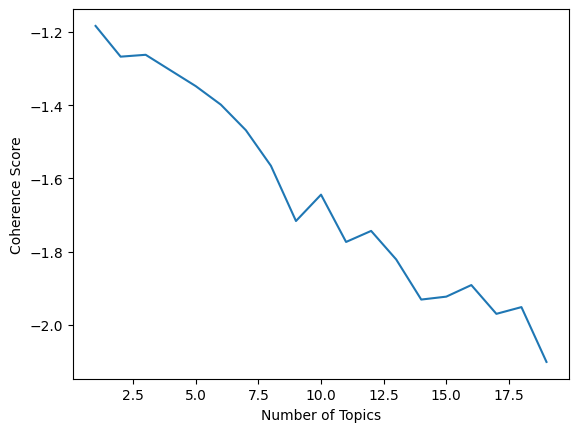

In [54]:
_ = plt.plot(topics, score)
_ = plt.xlabel('Number of Topics')
_ = plt.ylabel('Coherence Score')
plt.show()

In [55]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers=4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = docs['words'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())

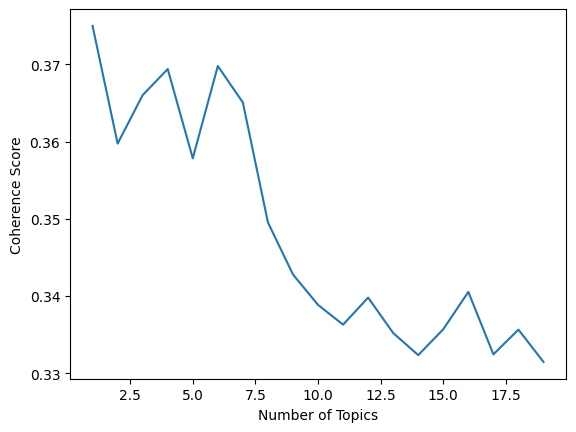

In [56]:
_ = plt.plot(topics, score)
_ = plt.xlabel('Number of Topics')
_ = plt.ylabel('Coherence Score')
plt.show()

In [57]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=5, workers = 4, passes=100)

In [58]:
lda_model.print_topics(-1)

[(0,
  '0.016*"got" + 0.014*"like" + 0.012*"get" + 0.009*"go" + 0.007*"one" + 0.007*"back" + 0.007*"said" + 0.007*"well" + 0.007*"thats" + 0.006*"man"'),
 (1,
  '0.067*"love" + 0.046*"oh" + 0.023*"feel" + 0.014*"baby" + 0.014*"like" + 0.013*"need" + 0.012*"come" + 0.011*"one" + 0.010*"yeah" + 0.010*"night"'),
 (2,
  '0.031*"know" + 0.022*"want" + 0.021*"la" + 0.017*"love" + 0.013*"think" + 0.013*"say" + 0.012*"get" + 0.012*"baby" + 0.011*"way" + 0.010*"cant"'),
 (3,
  '0.023*"know" + 0.021*"got" + 0.016*"go" + 0.016*"gonna" + 0.016*"love" + 0.015*"yeah" + 0.013*"baby" + 0.013*"get" + 0.013*"like" + 0.012*"make"'),
 (4,
  '0.015*"never" + 0.013*"time" + 0.012*"see" + 0.012*"away" + 0.011*"ill" + 0.010*"one" + 0.009*"know" + 0.008*"life" + 0.008*"ive" + 0.008*"day"')]

In [59]:
lda_model[corpus][0]

[(1, 0.15064329), (3, 0.5038926), (4, 0.3388208)]

In [64]:
import pyLDAvis
import pyLDAvis.gensim_models

In [65]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

In [66]:
pyLDAvis.save_html(lda_display, 'index.html')